<a href="https://colab.research.google.com/github/RandivCosta/data-analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Descriptive Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adjusted_data.csv")
# print(df)

# filter for each site
sites = ['Site 1', 'Site 2', 'Site 3']
areas = ['Sea Water', 'Sand']
allsites_stats_dfs = {} # to store dataframes for all sites and their areas
alltotal_bc = {} # to store total bc for all sites and their areas

In [4]:

# iterating through each site
for site in sites:
    print(f"=== Processing Site: {site} ===")

    #filter the main df for current site
    df_current_site = df[df['Site'] == site]
    # filter for area in each site

    current_site_stats_dfs = {} # to store dataframes of each area in current site
    current_site_total_bc = {} # to store current site total bc

    # iterating through each area in site 1
    for area in areas:
        print(f"--- Processing stats for {site} - {area} ---")

        df_current_site_current_area = df_current_site[df_current_site['Area'] == area]
        # validating
        if not df_current_site_current_area.empty:
            # selecting required columns to calculate statistics
            cols = df_current_site_current_area.iloc[:,[3,4,5,6,7,8,9]]
            col_names = cols.columns.tolist()
            cols_arr = cols.to_numpy()

            # calculating stats
            mean = np.mean(cols_arr, axis=0)
            median = np.median(cols_arr, axis=0)
            max = np.max(cols_arr, axis=0)
            min = np.min(cols_arr, axis=0)
            range_vals = np.ptp(cols_arr, axis=0)
            std = np.std(cols_arr, ddof=1, axis=0)

            # calculating total bc of 3 vareities in current area using mean
            total_bc = sum(mean[:3].tolist())
            current_site_total_bc[area] = total_bc

            #creating the dataframe for stats
            stats_data = [
                ['Mean'] + mean.tolist(),
                ['Median'] + median.tolist(),
                ['Max'] + max.tolist(),
                ['Min'] + min.tolist(),
                ['Range'] + range_vals.tolist(),
                ['Std'] + std.tolist()
            ]

            df_columns = ['Type'] + col_names
            stats_df = pd.DataFrame(stats_data, columns=df_columns)

            #store the dataframe in the dictionary
            current_site_stats_dfs[area] = stats_df
            print(stats_df) # print df for the current area
            print("-" * (len(str(stats_df).splitlines()[0]))) # to seperate areas

    allsites_stats_dfs[site] = current_site_stats_dfs
    alltotal_bc[site] = current_site_total_bc
    print('=' * 50) # to seperate sites



## adding two columns (site and area) to the dataframe before saving it to a csv file
dfs_to_concat = []

# iterating the final results dictionary
for site, areas in allsites_stats_dfs.items():
    for area, stats_df in areas.items():
        stats_df_modified = stats_df.copy() # apply copy() to avoid modifyng the original dictionary

        # adding 'Site' and 'Area' columns
        stats_df_modified.insert(0, 'Area', area)
        stats_df_modified.insert(0, 'Site', site)

        # append the modified dataframe to the list
        dfs_to_concat.append(stats_df_modified)

# add all dataframes into a single df
combined_stats_df = pd.concat(dfs_to_concat, ignore_index=True)
#validate
if dfs_to_concat:
    # get column names excluding the ones previously added
    original_data_columns = [col for col in dfs_to_concat[0].columns if col not in ['Site', 'Area']]
    final_column_order = ['Site', 'Area'] + original_data_columns
    # reindexing the combined dataframe
    combined_stats_df = combined_stats_df[final_column_order]

# save the combined df to a csv file
combined_stats_df.to_csv('/site_statistics.csv', index=False)
print(f"Statistics saved to 'site_statistics.csv'")
# print(combined_stats_df.head())

print("total bacterial count of each area in each site : ")
print(alltotal_bc)

=== Processing Site: Site 1 ===
--- Processing stats for Site 1 - Sea Water ---
     Type  BC-Enterococcus (CFU/100ml)  BC-Fecal Coliform(CFU/100ml)  \
0    Mean                   5415.00000                   6660.000000   
1  Median                   5550.00000                   6400.000000   
2     Max                   9500.00000                  11500.000000   
3     Min                   1600.00000                   1900.000000   
4   Range                   7900.00000                   9600.000000   
5     Std                   2475.21604                   3224.369017   

   BC-E-Coli (CFU/100ml)     PP-PH  PP-Conductivity  PP-Salinity  \
0            4405.000000  7.949000        51.940000    32.100000   
1            4300.000000  7.950000        52.400000    32.000000   
2            7000.000000  8.180000        53.400000    34.000000   
3            1200.000000  7.690000        49.800000    30.000000   
4            5800.000000  0.490000         3.600000     4.000000   
5      

### create separate graphs for 3 bacterial types against their total count for each area in each site

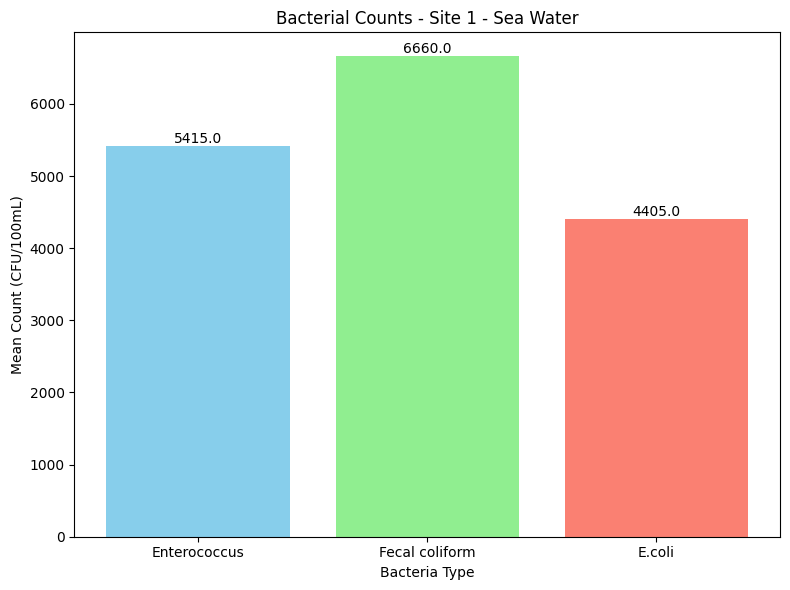

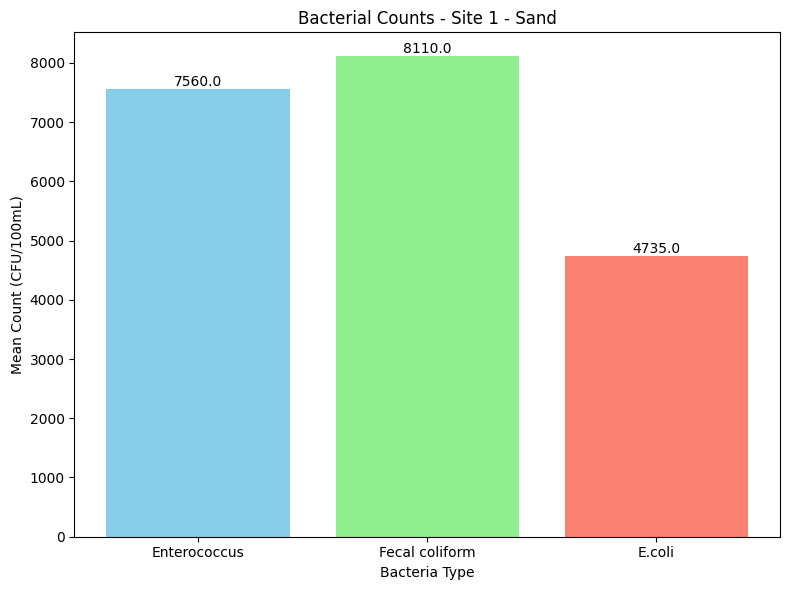

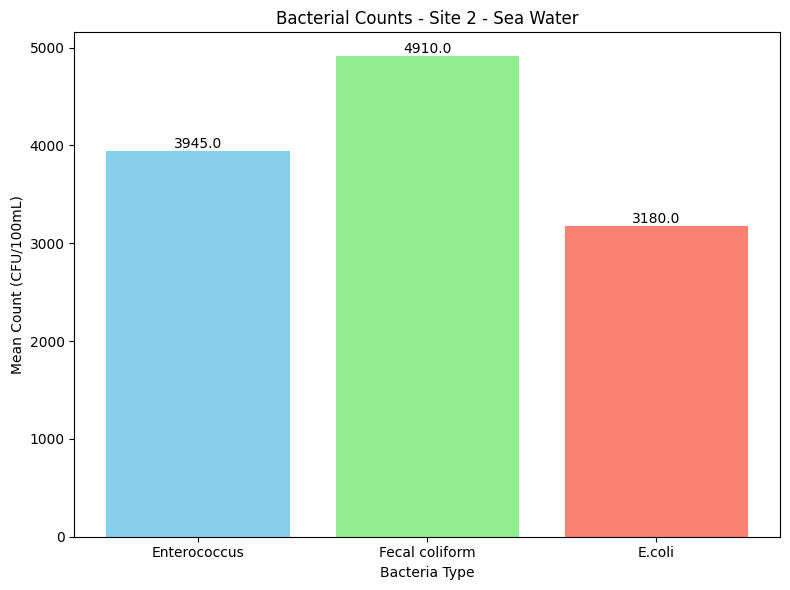

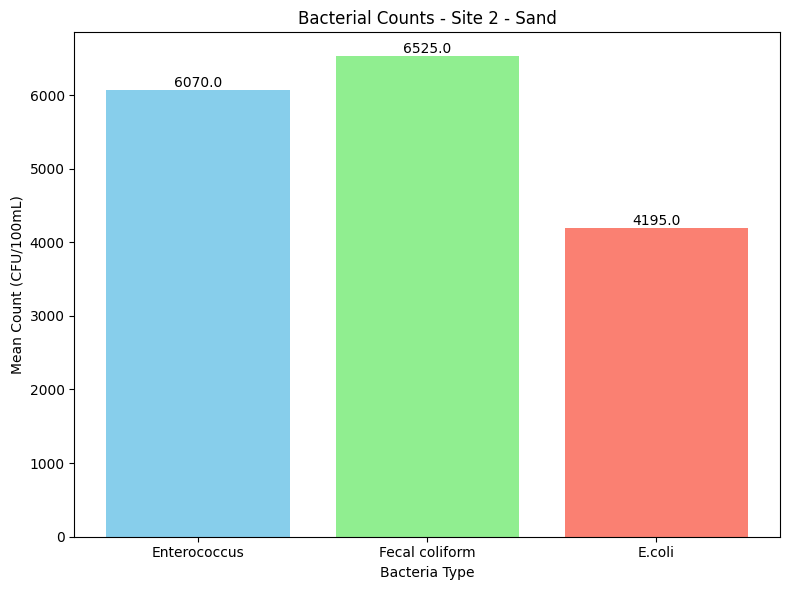

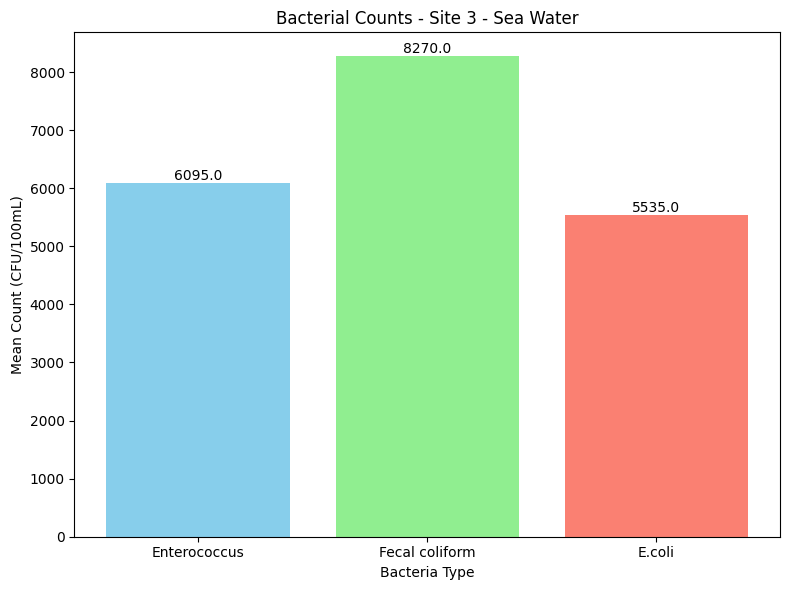

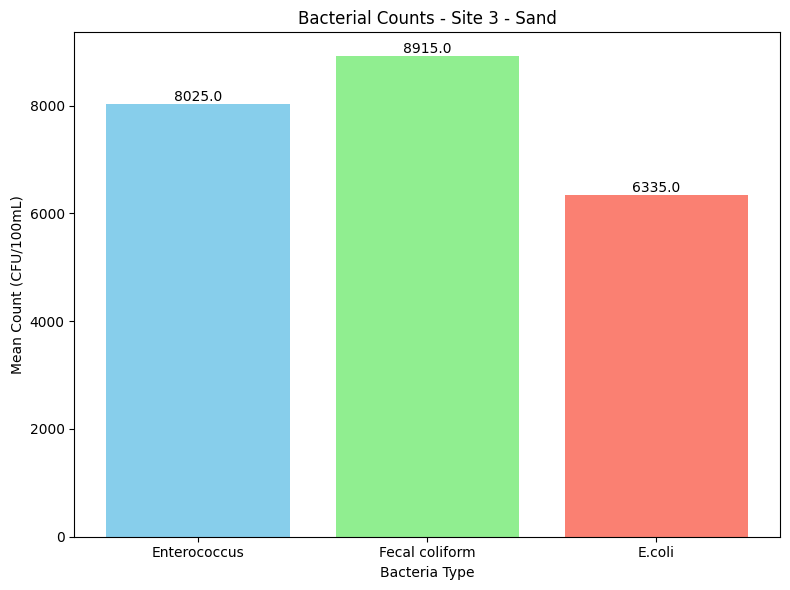

In [5]:

seawater_bc_list = [] # for find the total bc for each bacterial type in sea water
sand_bc_list = []

for site, areas in allsites_stats_dfs.items():
    for area, df in areas.items():
        # get mean row from dataframe
        mean_row = df[df['Type'] == 'Mean']
        mean_values = mean_row.iloc[0, 1:4].tolist()
        bacterial_names = ['Enterococcus', 'Fecal coliform', 'E.coli']

        # store bacterial counts in corresponding numpy array
        if area == 'Sea Water':
            seawater_bc_list.append(mean_values)
        elif area == 'Sand':
            sand_bc_list.append(mean_values)

        # creating figure
        fig, ax = plt.subplots(figsize=(8, 6))

        bars = ax.bar(bacterial_names, mean_values, color=['skyblue', 'lightgreen', 'salmon'])

        ax.set_title(f'Bacterial Counts - {site} - {area}')
        ax.set_xlabel('Bacteria Type')
        ax.set_ylabel('Mean Count (CFU/100mL)')

        # adding value on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom')

        # plt.xticks(rotation=45)

        plt.tight_layout() # adjust layout

        plt.show()
        # plt.savefig(f'{site}_{area}_bacterial_counts.png', dpi=300, bbox_inches='tight')
        # plt.close()

### graphs for total bacterial counts for 3 bacterial varieties in each sand and seawater across all sites

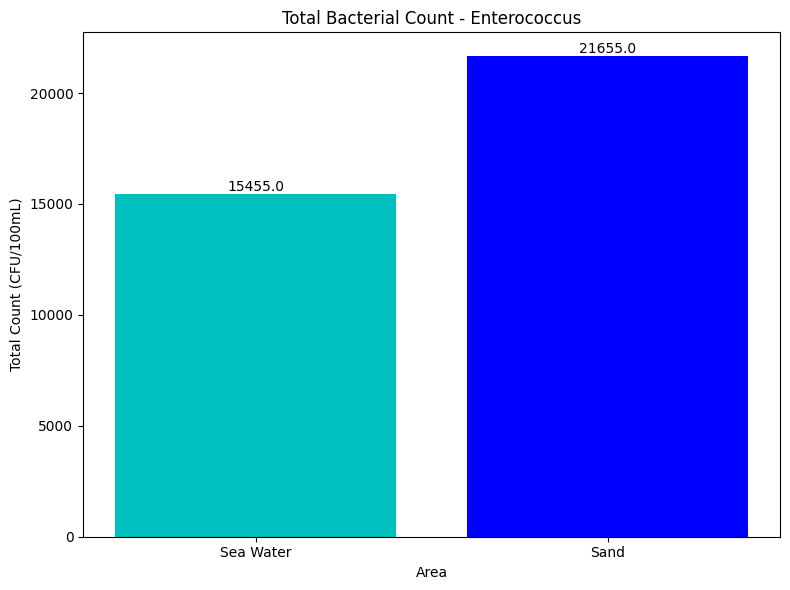

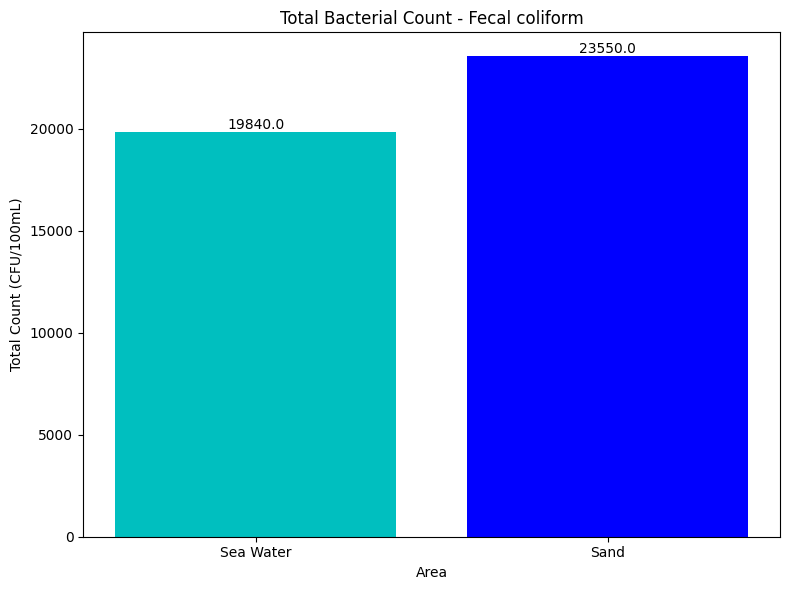

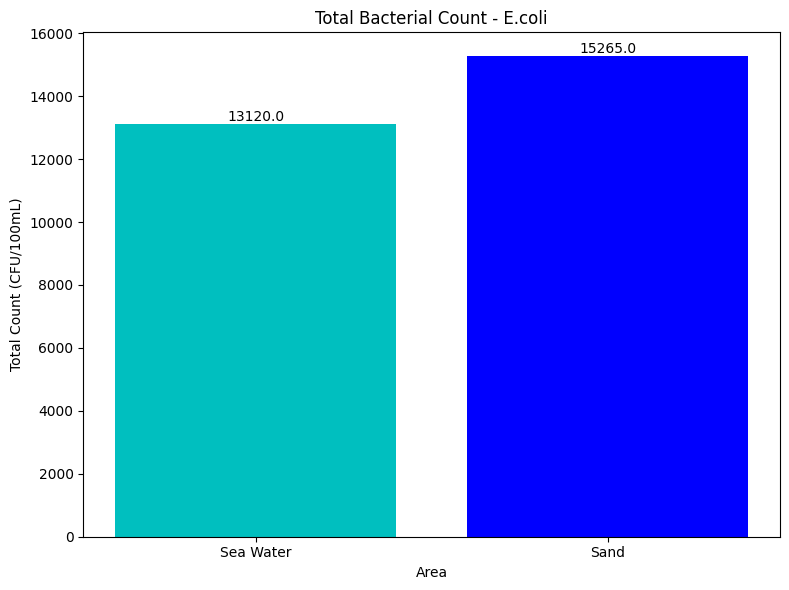

In [6]:

seawater_bc = np.array(seawater_bc_list) # seawater bc in each sites
sand_bc = np.array(sand_bc_list)
total_seawater_bc = np.sum(seawater_bc, axis=0) # total bc in seawater of all sites
total_sand_bc = np.sum(sand_bc, axis=0)
bacterial_names = ['Enterococcus', 'Fecal coliform', 'E.coli']

for i in range(3):
    total_bc = [total_seawater_bc[i] , total_sand_bc[i]]
    # creating figure
    fig, ax = plt.subplots(figsize=(8, 6))

    bars = ax.bar(['Sea Water', 'Sand'], total_bc, color=['c', 'b'])

    ax.set_title(f'Total Bacterial Count - {bacterial_names[i]}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Total Count (CFU/100mL)') #using mean bc

    # adding value on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')

    # plt.xticks(rotation=45)

    plt.tight_layout() # adjust layout

    plt.show()
    # plt.savefig(f'{bacterial_names[i]}_total_bc.png', dpi=300, bbox_inches='tight')
    # plt.close()